In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('test_1.csv',encoding='gbk')
df.head()

,Unnamed: 0,company_name,listing_days,maker_num,employee_num,customer_rt_1st,net_profit_rt,asset,net_asset_per_share,current_rt,gross_cash_flow,net_profit_gr,highest_executive_edu,trading_happen
0,0,中科软,4360.0,1.0,11505.0,0.0666,0.049140,363414.84,2.199850,1.253261,150666.22,0.141548,4.0,1
1,1,北京时代,4293.0,1.0,247.0,0.1850,-0.114209,72678.87,5.088048,1.064050,1020.98,-3.359722,3.0,1
2,2,华环电子,4051.0,1.0,470.0,0.2069,0.053101,22421.57,1.469024,2.500393,5287.40,-0.294529,4.0,1
3,3,现代农装,4041.0,1.0,1627.0,0.1148,-0.313537,156859.94,-0.013698,0.626463,4884.82,0.199084,4.0,1
4,4,指南针,3995.0,1.0,1437.0,0.1001,0.251228,78769.94,1.768365,1.421174,52707.32,0.368085,3.0,1


# 数据检视

In [7]:
#查看数据列名称
df.columns

Index(['Unnamed: 0', 'company_name', 'listing_days', 'maker_num',
       'employee_num', 'customer_rt_1st', 'net_profit_rt', 'asset',
       'net_asset_per_share', 'current_rt', 'gross_cash_flow', 'net_profit_gr',
       'highest_executive_edu', 'trading_happen'],
      dtype='object')

In [18]:
# 查看数据行列数
df.shape

(1142, 14)

In [13]:
# 查看数据描述性统计
df.describe(include = 'all')

,Unnamed: 0,company_name,listing_days,maker_num,employee_num,customer_rt_1st,net_profit_rt,asset,net_asset_per_share,current_rt,gross_cash_flow,net_profit_gr,highest_executive_edu,trading_happen
count,1142.00000,1140,1140.000000,1140.000000,1128.000000,1133.000000,1134.000000,1141.000000,1139.000000,1138.000000,1141.000000,1141.000000,1140.000000,1142.000000
unique,NaN,1122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,必控科技,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,570.50000,NaN,1399.039474,3.147368,249.266844,0.214527,-1.310933,24530.815863,2.315565,5.133812,3816.951823,-3.003930,3.077193,0.875657
std,329.81131,NaN,455.223554,3.496548,483.339891,0.163231,40.462729,40759.080570,1.755563,32.390849,13185.910089,78.043495,0.706925,0.330117
min,0.00000,NaN,1048.000000,1.000000,5.000000,0.000000,-1361.913242,0.000000,-3.187050,0.061754,-29.720000,-2448.312042,1.000000,0.000000
25%,285.25000,NaN,1144.000000,1.000000,76.750000,0.101100,0.000524,6213.010000,1.322801,1.415907,415.320000,-0.735935,3.000000,1.000000
50%,570.50000,NaN,1248.000000,1.000000,139.500000,0.165500,0.061184,13127.290000,1.878078,2.136575,1318.380000,-0.058824,3.000000,1.000000
75%,855.75000,NaN,1437.000000,4.000000,269.250000,0.291700,0.129669,26733.960000,2.860200,3.898784,3429.320000,0.495356,4.000000,1.000000


In [15]:
# 查看数据表缺失值
df.isna().sum()

Unnamed: 0                0
company_name              2
listing_days              2
maker_num                 2
employee_num             14
customer_rt_1st           9
net_profit_rt             8
asset                     1
net_asset_per_share       3
current_rt                4
gross_cash_flow           1
net_profit_gr             1
highest_executive_edu     2
trading_happen            0
dtype: int64

In [17]:
#查看数据表重复值
df.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000ACD7609FD0>,
      dtype=object)

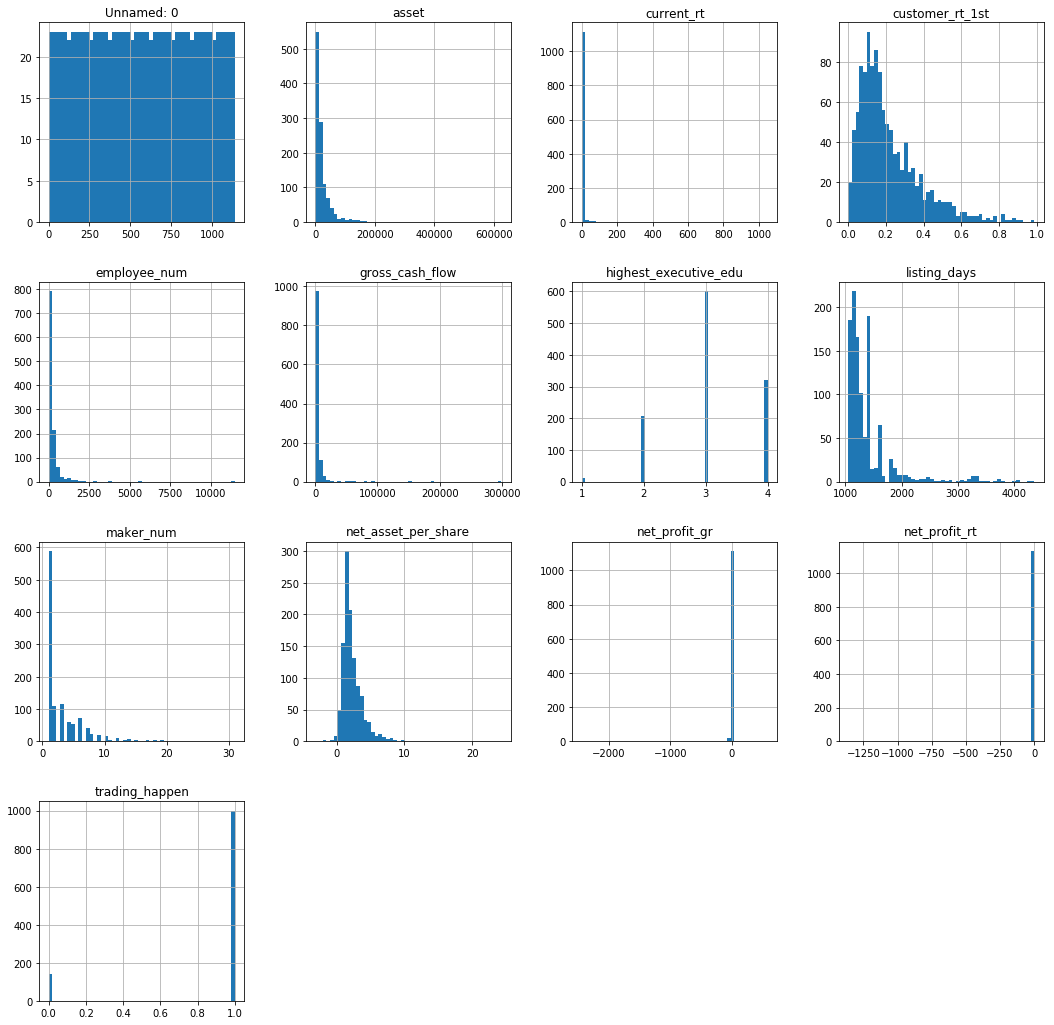

In [20]:
# 查看数据分布
df.hist(figsize=(18,18),bins=50)

In [ ]:
#由上图可知字段
#符合近似伯松分布的有：highest_executive_edu,trading_happen 
#符合近似正太分布字段有：asset ，customer_rt_1st ，current_rt，employee_num  ，gross_cash_flow
#maker_num，net_asset_per_share

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn_pandas import DataFrameMapper

In [26]:
df.dtypes

Unnamed: 0                 int64
company_name              object
listing_days             float64
maker_num                float64
employee_num             float64
customer_rt_1st          float64
net_profit_rt            float64
asset                    float64
net_asset_per_share      float64
current_rt               float64
gross_cash_flow          float64
net_profit_gr            float64
highest_executive_edu    float64
trading_happen             int64
dtype: object

In [45]:
x_mapper=DataFrameMapper
([
    #填充缺失值
    (['listing_days'],SimpleImputer(fill_value=0)),
    #转变为正太分布,填充缺失值使用均值填充
    (['asset'],[SimpleImputer(),PowerTransformer()]),
    (['customer_rt_1st'],[SimpleImputer(),PowerTransformer()]),
    (['current_rt'],[SimpleImputer(),PowerTransformer()]),
    (['employee_num'],[SimpleImputer(),PowerTransformer()]),
    (['gross_cash_flow'],[SimpleImputer(),PowerTransformer()]),
    #离散型变量处理
    (['highest_executive_edu'],[SimpleImputer(strategy='most_frequent'),StandardScaler()]),
    (['trading_happen'],[SimpleImputer(strategy='most_frequent'),StandardScaler()]),
],'df_out = False')


([(['listing_days'],
   SimpleImputer(add_indicator=False, copy=True, fill_value=0, missing_values=nan,
                 strategy='mean', verbose=0)),
  (['asset'], [SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                  missing_values=nan, strategy='mean', verbose=0),
    PowerTransformer(copy=True, method='yeo-johnson', standardize=True)]),
  (['customer_rt_1st'],
   [SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                  missing_values=nan, strategy='mean', verbose=0),
    PowerTransformer(copy=True, method='yeo-johnson', standardize=True)]),
  (['current_rt'],
   [SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                  missing_values=nan, strategy='mean', verbose=0),
    PowerTransformer(copy=True, method='yeo-johnson', standardize=True)]),
  (['employee_num'],
   [SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                  missing_values=nan, strategy='mean', verbose=0),
    PowerTran

In [50]:
# 数据集分割
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1000,random_state=0)

In [ ]:
#数据重构
#样本数量
(y_train==0).sum()

In [ ]:
(y_train==1).sum()

In [ ]:
num_sml=(y_train==0).sum()
num_big=(y_train==1).sum()
#确定需要重采样的数据
num_sample=num_big-num_sml

## 构建模型

In [ ]:
#导入模型
from sklearn.linear_model import LogisticRegression
#创建回归模型
clf=LogisticRegression(penalty='l1',solver='saga',tol=0.1,C=0.1,random_state=0)
#用训练集训练模型
clf.fit(X_train_bal,y_train_bal)
#用测试集测试模型
y_pred=clf.predict(X_test)